In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'C:/Users/khoat/OneDrive - National Economics University/Desktop/1. Study/3.1. Data Preparation & Visualiazation/Final/data/'

In [3]:
sample = pd.read_csv(path + 'sample.csv')
test = pd.read_csv(path + 'test.csv', sep=';')
train = pd.read_csv(path + 'train.csv', sep=';')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        5841 non-null   object 
 9   engine         5841 non-null   object 
 10  max_power      5846 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5841 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 609.5+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2128 non-null   int64  
 1   name          2128 non-null   object 
 2   year          2128 non-null   int64  
 3   km_driven     2128 non-null   int64  
 4   fuel          2128 non-null   object 
 5   seller_type   2128 non-null   object 
 6   transmission  2128 non-null   object 
 7   owner         2128 non-null   object 
 8   mileage       2066 non-null   object 
 9   engine        2066 non-null   object 
 10  max_power     2067 non-null   object 
 11  torque        2066 non-null   object 
 12  seats         2066 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 216.2+ KB


In [6]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,66.1 bhp,90Nm@ 3500rpm,5.0
5996,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0
5997,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,84 bhp,114Nm@ 3500rpm,5.0
5998,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,63 bhp,180Nm@ 1440-1500rpm,9.0


from sklearn.preprocessing import OneHotEncoder
one_hot_enc = OneHotEncoder(handle_unknown='ignore')

one_hot_enc.fit_transform(train.seller_type.reshape(-1, 1))

In [7]:
for i in [train, test]:
    i['brand'] = i.name.str.split(n=1, expand=True)[0]

In [8]:
for i in [train, test]:
    i['n_mileage'] = i.mileage.str.split(n=1, expand=True)[0].astype('float64')

In [9]:
for i in [train, test]:
    i['n_engine'] = i.engine.str.split(n=1, expand=True)[0].astype('float64')

In [10]:
for i in [train, test]:
    i['n_max_power'] = (i.max_power.str.split(pat='b', n=1, expand=True)[0]).str.split(n=1, expand=True)[0].astype(
        'float64')

In [11]:
for i in [train, test]:
    i['torque_nm'] = (((((i.torque.str.split(pat='N', n=1, expand=True)[0]).str.split(pat='n', n=1, expand=True)[0]).str.split(pat='@', n=1, expand=True)[0]).str.split(pat='k', n=1, expand=True)[0]).str.split(n=1, expand=True)[0]).str.split(pat='(', n=1, expand=True)[0].astype('float64')

In [12]:
for i in [train, test]:
    i['n_owner'] = i['owner'].copy()
    i['n_owner'].replace(to_replace='First Owner', value=1, inplace=True)
    i['n_owner'].replace(to_replace='Second Owner', value=2, inplace=True)
    i['n_owner'].replace(to_replace='Third Owner', value=3, inplace=True)
    i['n_owner'].replace(to_replace='Fourth & Above Owner', value=4, inplace=True)
    i['n_owner'].replace(to_replace='Test Drive Car', value=0, inplace=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        5841 non-null   object 
 9   engine         5841 non-null   object 
 10  max_power      5846 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5841 non-null   float64
 13  brand          6000 non-null   object 
 14  n_mileage      5841 non-null   float64
 15  n_engine       5841 non-null   float64
 16  n_max_power    5845 non-null   float64
 17  torque_nm      5840 non-null   float64
 18  n_owner 

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2128 non-null   int64  
 1   name          2128 non-null   object 
 2   year          2128 non-null   int64  
 3   km_driven     2128 non-null   int64  
 4   fuel          2128 non-null   object 
 5   seller_type   2128 non-null   object 
 6   transmission  2128 non-null   object 
 7   owner         2128 non-null   object 
 8   mileage       2066 non-null   object 
 9   engine        2066 non-null   object 
 10  max_power     2067 non-null   object 
 11  torque        2066 non-null   object 
 12  seats         2066 non-null   float64
 13  brand         2128 non-null   object 
 14  n_mileage     2066 non-null   float64
 15  n_engine      2066 non-null   float64
 16  n_max_power   2067 non-null   float64
 17  torque_nm     2066 non-null   float64
 18  n_owner       2128 non-null 

In [15]:
for i in [train, test]:
    i.fillna(i.mean(),inplace=True)

In [16]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,n_mileage,n_engine,n_max_power,torque_nm,n_owner
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0,Tata,21.50,1497.0,108.50,260.00,1
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0,Hyundai,21.19,1396.0,88.76,219.66,1
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0,Toyota,12.55,2982.0,168.50,360.00,2
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0,Hyundai,17.01,1591.0,121.30,154.90,1
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,Volvo,18.00,1969.0,190.00,400.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,66.1 bhp,90Nm@ 3500rpm,5.0,Maruti,19.00,998.0,66.10,90.00,1
5996,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0,Maruti,26.60,998.0,58.16,77.00,1
5997,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,84 bhp,114Nm@ 3500rpm,5.0,Tata,20.30,1199.0,84.00,114.00,1
5998,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,63 bhp,180Nm@ 1440-1500rpm,9.0,Mahindra,15.96,2523.0,63.00,180.00,2


In [17]:
test

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,n_mileage,n_engine,n_max_power,torque_nm,n_owner
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,103.5 bhp,153Nm@ 3800rpm,5.0,Skoda,14.30,1598.0,103.50,153.00,1
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0,Honda,17.80,1497.0,117.30,145.00,1
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0,Hyundai,19.10,1197.0,82.00,114.00,1
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,120 bhp,290Nm@ 1800-2800rpm,7.0,Mahindra,12.05,2179.0,120.00,290.00,1
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,98.96 bhp,215Nm@ 1750-2500rpm,5.0,Ford,21.70,1498.0,98.96,215.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2124,Hyundai Grand i10 Nios Sportz,2020,2000,Petrol,Dealer,Manual,First Owner,20.7 kmpl,1197 CC,81.86 bhp,113.75Nm@ 4000rpm,5.0,Hyundai,20.70,1197.0,81.86,113.75,1
2124,2125,Maruti Swift Dzire VDI,2018,100000,Diesel,Individual,Manual,Second Owner,28.4 kmpl,1248 CC,74.02 bhp,190Nm@ 2000rpm,5.0,Maruti,28.40,1248.0,74.02,190.00,2
2125,2126,Tata Indica V2 DLE BSIII,2011,172000,Diesel,Individual,Manual,Second Owner,17.88 kmpl,1396 CC,52.8 bhp,85Nm@ 2500rpm,5.0,Tata,17.88,1396.0,52.80,85.00,2
2126,2127,Hyundai Creta 1.6 CRDi SX,2017,47000,Diesel,Individual,Manual,Second Owner,19.67 kmpl,1582 CC,126.2 bhp,259.9Nm@ 1900-2750rpm,5.0,Hyundai,19.67,1582.0,126.20,259.90,2


<AxesSubplot:>

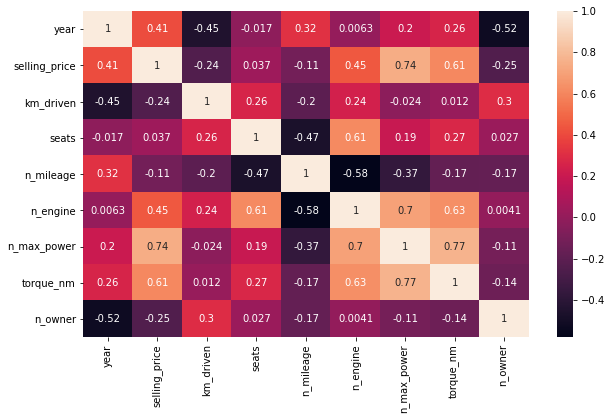

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(),annot=True)

C:\Users\khoat\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


year                AxesSubplot(0.125,0.536818;0.133621x0.343182)
selling_price    AxesSubplot(0.285345,0.536818;0.133621x0.343182)
km_driven         AxesSubplot(0.44569,0.536818;0.133621x0.343182)
seats            AxesSubplot(0.606034,0.536818;0.133621x0.343182)
n_mileage        AxesSubplot(0.766379,0.536818;0.133621x0.343182)
n_engine               AxesSubplot(0.125,0.125;0.133621x0.343182)
n_max_power         AxesSubplot(0.285345,0.125;0.133621x0.343182)
torque_nm            AxesSubplot(0.44569,0.125;0.133621x0.343182)
n_owner             AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

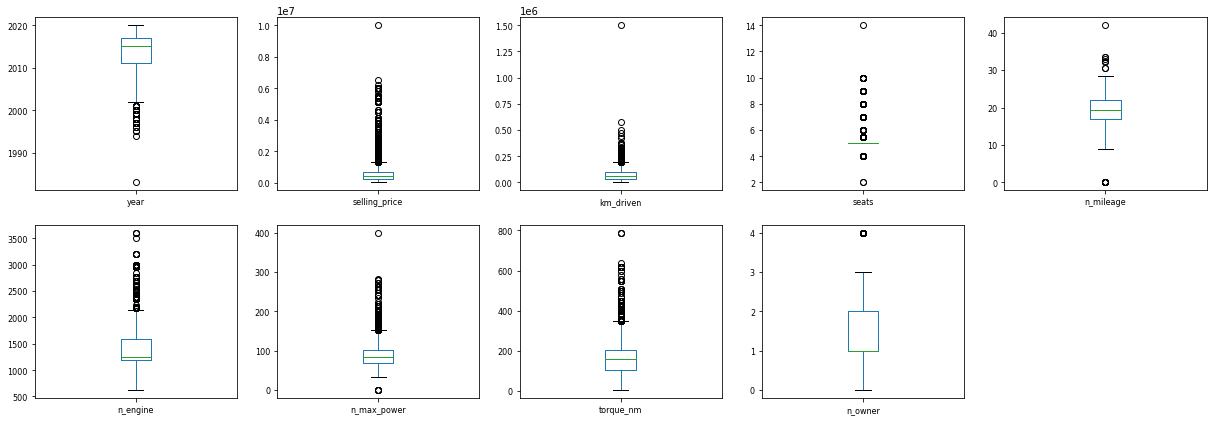

In [19]:
fig = plt.figure(figsize = (21,7))
ax = fig.gca()
train.plot(kind='box', subplots=True, layout=(2,5), sharex=False, sharey=False, fontsize=8, ax=ax)

In [20]:
train = train[train['selling_price'] < 2000000]
train = train[train['km_driven'] < 250000]
train = train[train['n_engine'] < 2400]
train = train[train['n_max_power'] < 190]
train = train[train['torque_nm'] < 400]

In [21]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,n_mileage,n_engine,n_max_power,torque_nm,n_owner
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0,Tata,21.50,1497.0,108.50,260.00,1
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0,Hyundai,21.19,1396.0,88.76,219.66,1
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0,Hyundai,17.01,1591.0,121.30,154.90,1
5,Fiat Avventura Power Up 1.3 Emotion,2015,500000,96500,Diesel,Individual,Manual,First Owner,20.5 kmpl,1248 CC,91.72 bhp,209Nm@ 2000rpm,5.0,Fiat,20.50,1248.0,91.72,209.00,1
6,Hyundai i10 Magna 1.2 iTech SE,2013,325000,70000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.7Nm@ 4000rpm,5.0,Hyundai,20.36,1197.0,78.90,111.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,Honda City i DTEC V,2015,725000,50000,Diesel,Individual,Manual,Second Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0,Honda,26.00,1498.0,98.60,200.00,2
5995,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,66.1 bhp,90Nm@ 3500rpm,5.0,Maruti,19.00,998.0,66.10,90.00,1
5996,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0,Maruti,26.60,998.0,58.16,77.00,1
5997,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,84 bhp,114Nm@ 3500rpm,5.0,Tata,20.30,1199.0,84.00,114.00,1


In [22]:
x = train[['year', 'km_driven', 'seats', 'n_mileage', 'n_engine', 'n_max_power', 'torque_nm', 'n_owner']]
y = train['selling_price']

In [23]:
x_test = test[['year', 'km_driven', 'seats', 'n_mileage', 'n_engine', 'n_max_power', 'torque_nm', 'n_owner']]

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val= train_test_split(x,y,test_size=0.2,random_state=21)

In [25]:
from sklearn.linear_model import LinearRegression
# Fit the model
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [26]:
lm.coef_

array([ 3.06570361e+04, -1.03090842e+00, -4.39397754e+03,  1.97885189e+02,
       -5.13088753e+00,  4.68139575e+03,  8.46139216e+02, -1.85715827e+04])

In [27]:
train_pred = lm.predict(x_train)
val_pred = lm.predict(x_val)

In [28]:
from sklearn import metrics
print('Train set:')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

Train set:
RMSE: 158839.6685339503


In [29]:
print('Validation set:')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, val_pred)))

Validation set:
RMSE: 155686.1276970767


In [30]:
test_pred = lm.predict(x_test)

In [31]:
submit = sample.copy()

In [32]:
submit.Predicted = test_pred

In [33]:
submit

,Id,Predicted
0,1,681358.585371
1,2,746318.784623
2,3,418269.728751
3,4,662604.195350
4,5,599711.379355
...,...,...
2123,2124,682072.488401
2124,2125,530235.821201
2125,2126,50386.203162
2126,2127,854196.038764


In [34]:
submit.Predicted.mean()

497928.3305118016

In [38]:
submit[submit.Predicted <= 3000]

,Id,Predicted
5,6,-147810.144451
57,58,-49082.234051
75,76,-313546.638383
97,98,-300920.751639
119,120,-121218.001964
...,...,...
1904,1905,-77483.297948
1984,1985,-2961.571608
1989,1990,-76090.383800
2088,2089,-157559.382550


In [39]:
submit['Predicted'] = submit['Predicted'].mask(submit['Predicted'] < 3000, submit.Predicted.mean())

In [43]:
submit

,Id,Predicted
0,1,681358.585371
1,2,746318.784623
2,3,418269.728751
3,4,662604.195350
4,5,599711.379355
...,...,...
2123,2124,682072.488401
2124,2125,530235.821201
2125,2126,50386.203162
2126,2127,854196.038764


In [44]:
submit.to_csv(path_or_buf='C:/Users/khoat/OneDrive - National Economics University/Desktop/1. Study/3.1. Data Preparation & Visualiazation/Final/data/submit_11_12_1.csv', index=False)

In [45]:
#gg